# Welcome to the contact insulation notebook!

Outline:
- Calculate insulation score
- Demonstrate effect of window size
- Call insulating boundaries
- Filter insulating boundaries
- Enrichment of CTCF/genes at boundaries
- Repeat filtering based on CTCF enrichmnent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import cooler
import cooltools.lib.plotting
from cooltools.insulation import calculate_insulation_score, find_boundaries

In [3]:
clr = cooler.Cooler('test.mcool::resolutions/1000')
insulation = calculate_insulation_score(clr, [3000, 5000, 10000, 25000], verbose=True)

INFO:root:Processing chr2
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:root:Processing chr17


In [4]:
insulation.iloc[1000:1005]

,chrom,start,end,is_bad_bin,log2_insulation_score_3000,n_valid_pixels_3000,log2_insulation_score_5000,n_valid_pixels_5000,log2_insulation_score_10000,n_valid_pixels_10000,log2_insulation_score_25000,n_valid_pixels_25000
1000,chr2,1000000,1001000,False,-0.095267,6.0,-0.084323,22.0,-0.041989,97.0,0.061618,597.0
1001,chr2,1001000,1002000,False,0.041712,6.0,-0.065991,22.0,-0.019041,97.0,0.078254,597.0
1002,chr2,1002000,1003000,False,0.058296,6.0,0.014266,22.0,0.018272,97.0,0.093288,597.0
1003,chr2,1003000,1004000,False,0.052065,6.0,-0.005012,22.0,0.003246,97.0,0.077201,597.0
1004,chr2,1004000,1005000,False,0.010391,6.0,-0.063679,22.0,0.071084,87.0,0.055302,597.0


In [5]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

(10500000, 10750000)

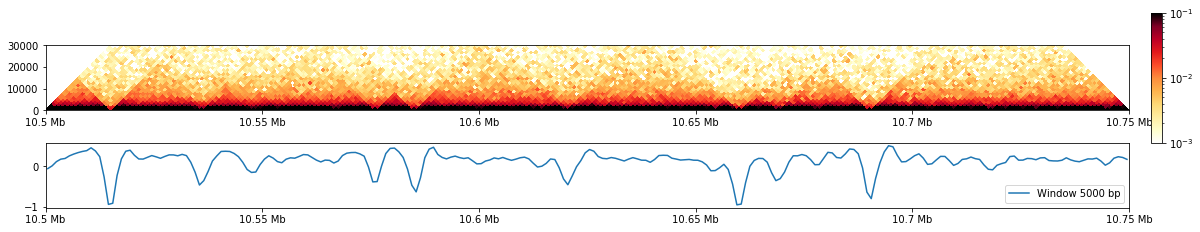

In [18]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid import make_axes_locatable
import bioframe

region = ('chr2', 10_500_000, 10_750_000)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr.matrix(balance=True).fetch(region)
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=1000, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 30000)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.3)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region['log2_insulation_score_5000'], label='Window 5000 bp')

ins_ax.legend()

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

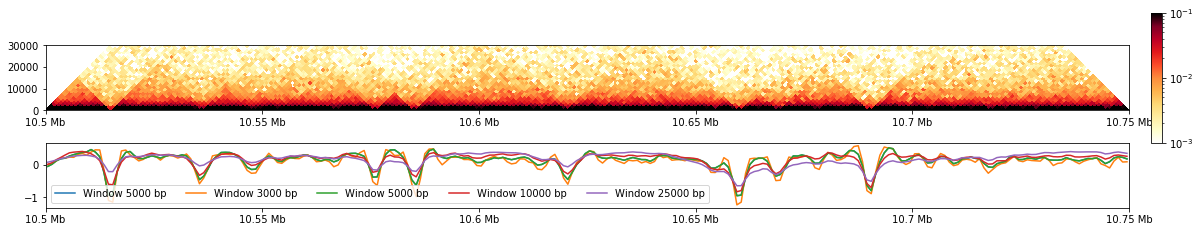

In [19]:
for res in 3000, 5000, 10000, 25000:
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{res}'], label=f'Window {res} bp')
ins_ax.legend(ncol=5)
f

## Boundary calling

In [8]:
insulation = find_boundaries(insulation)

In [9]:
insulation.iloc[1000:1005]

,chrom,start,end,is_bad_bin,log2_insulation_score_3000,n_valid_pixels_3000,log2_insulation_score_5000,n_valid_pixels_5000,log2_insulation_score_10000,n_valid_pixels_10000,log2_insulation_score_25000,n_valid_pixels_25000,boundary_strength_3000,boundary_strength_10000,boundary_strength_5000,boundary_strength_25000
1000,chr2,1000000,1001000,False,-0.095267,6.0,-0.084323,22.0,-0.041989,97.0,0.061618,597.0,0.132509,0.102013,0.098588,0.031671
1001,chr2,1001000,1002000,False,0.041712,6.0,-0.065991,22.0,-0.019041,97.0,0.078254,597.0,NaN,NaN,NaN,NaN
1002,chr2,1002000,1003000,False,0.058296,6.0,0.014266,22.0,0.018272,97.0,0.093288,597.0,NaN,NaN,NaN,NaN
1003,chr2,1003000,1004000,False,0.052065,6.0,-0.005012,22.0,0.003246,97.0,0.077201,597.0,NaN,0.015027,NaN,NaN
1004,chr2,1004000,1005000,False,0.010391,6.0,-0.063679,22.0,0.071084,87.0,0.055302,597.0,NaN,NaN,NaN,NaN


(10500000, 10750000)

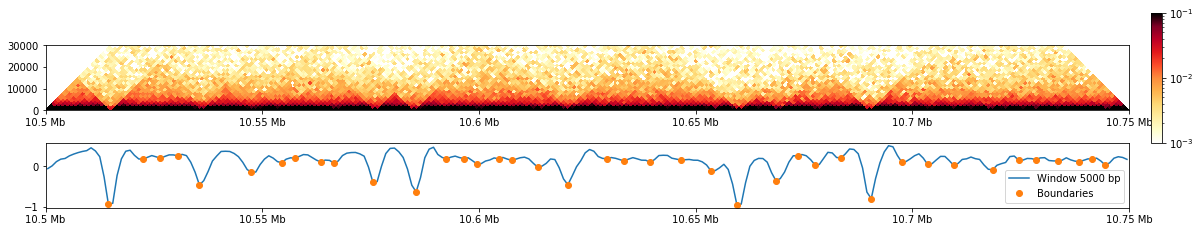

In [10]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=1000, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 30000)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.3)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region['log2_insulation_score_5000'], label='Window 5000 bp')
boundaries = insul_region[~np.isnan(insul_region['boundary_strength_5000'])]
ins_ax.plot(boundaries[['start', 'end']].mean(axis=1), boundaries['log2_insulation_score_5000'], 'o', label='Boundaries')

ins_ax.legend()

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])